<a href="https://colab.research.google.com/github/Rafi653/Data-Mining/blob/feature%2Fhw4_1.0/Copy_of_Homework_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Homework 4

**Before you start:** Read Chapter 6 Linear Regression and Chapter 7 K-Nearst-Neighbors in the textbook.

**Note:** Please enter the code along with your comments in the **TODO** section.

Alternative solutions are welcomed.

## Part 1: Linear Regression

### Problem 1 ##

In this problem, you are expected to build a model to predict the Boston housing price.


In [ ]:
# # Please remove # and run the following code if you have an error while importing the dataset
# !pip install --upgrade openpyxl

In [ ]:
from sklearn import datasets
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
np.set_printoptions(suppress=True)
import sklearn

In [ ]:
print(sklearn.datasets.load_boston().DESCR)

In [ ]:
#Load boston housing dataset
boston_housing = datasets.load_boston()
X = pd.DataFrame(boston_housing['data'], columns = boston_housing['feature_names'])

#"target" is the response variable 
# which represents the median value of owner-occupied homes in $1000
y = boston_housing['target'] 

In [ ]:
data = X
data['target'] = y

In [ ]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2



**TODO 1**

Prevent collinearity by removing linearly dependent variables. 

For example, if 2 variables A and B have a correlation coefficient larger than 0.9, eliminate one to avoid redundency.

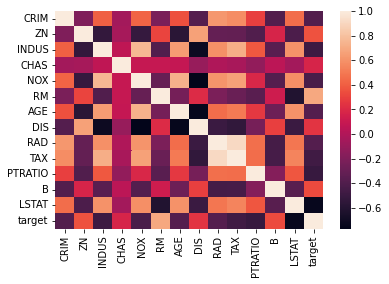

In [ ]:
import seaborn as sns
r = data.corr()
r
r < -0.9
# r > 0.9
sns.heatmap(r)

# RAD & TAX

In [ ]:
data.drop(['RAD'], axis=1, inplace=True)
data.head()

KeyError: ignored


**TODO 2**

Partition the data into 75% training and 25% validation set.

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(data.iloc[:, :-1], 
                                                  data['target'], 
                                                  test_size = 0.25,
                                                  random_state = 1)


**TODO 3**

If we fit a linear regression model on the training set, what will be the feature weights? 

Calculate the feature weights using the matrix form (do not use any built-in packages such as sklearn or stat models).

In [ ]:
w = np.linalg.inv(X_train.T.dot(X_train)).dot(X_train.T).dot(y_train)

print(w)
# def predict(self, X):
#         return X.dot(self.w)

[-0.08331443  0.05308159 -0.04122959  2.58626504 -2.97561077  5.49159142
 -0.00286607 -0.92140713 -0.00080416 -0.2806534   0.01215365 -0.43275056]



**TODO 4**

Now only consider two input variables: Age and RM.

Fit a linear regression model on the training set with a package at your choice. 

Present the model summary. We call this model **Model 1**.

In [ ]:

X_train, X_val, y_train, y_val = train_test_split(data[['AGE', 'RM']], 
                                                  data['target'], 
                                                  test_size = 0.25,
                                                  random_state = 1)

from sklearn.linear_model import LinearRegression

linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_pred = linreg.predict(X_val)
print(y_pred)

# from sklearn.linear_model import Lasso
# model = Lasso(alpha=1.0)
# model.fit(X_train, y_train)

# yhat = model.predict(X_val)

# print(yhat)


[26.68693334 26.6749417  19.26971328 23.38465076 13.35931592 20.82862051
 28.88570185 18.3962538  17.99347375 23.77712436 25.56364518 30.33818838
 18.68301675 21.90312603 18.81488658 14.90072311 23.29286657 39.77756768
 24.12914216 10.11575226 17.46140056 15.05139253 23.16747997 25.89560895
 26.78385578 17.44783735 18.8314421  22.18538569 30.17455282 13.348692
 27.47574888 17.32350099 38.76518835 20.02374806 24.50230965 22.00659229
 20.71817241 30.25306855  3.82652026 20.37026502 27.15703085 25.23588994
 24.08507489 19.28762137 19.51833298 25.98982658 31.5768666  17.43747788
 19.18914219 22.10297099 27.89537921 24.41583726 24.48230108 20.57705395
 11.18510472 23.9314283  18.56061488 22.64614399 19.28020119 37.21052028
 20.95010058 26.2023505  16.03814126 21.61612136 20.82594535 28.65032821
 37.65055965 25.22892325 22.65648831 17.42684638 26.03872976  7.69872452
 10.7473473  23.9735614  20.0250779  20.95984025 25.71299991 26.85477019
 21.69591424 32.43518339 21.19924161 19.4398851  31.7


**TODO 5**

Evaluate the prediction performance of Model 1 on the validation set with RMSE and MAE as performance matrics.

In [ ]:
from sklearn import metrics

mae = metrics.mean_absolute_error(y_val, y_pred)
print(mae)


rmse = np.sqrt(metrics.mean_squared_error(y_val, y_pred))
print(rmse)



4.692246377079943
6.236968213396187



**TODO 6**

Now consider all the features (after removing linearly dependent variables). 

Fit a linear regression model on the training set with a package at your choice. Present the model summary. 

We call this model **Model 2**.

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(data.iloc[:, :-1], 
                                                  data['target'], 
                                                  test_size = 0.25,
                                                  random_state = 1)

from sklearn.linear_model import LinearRegression

linreg = LinearRegression()
linreg.fit(X_train, y_train)

y_pred = linreg.predict(X_val)
print(y_pred)

[30.73638039 28.6901287  17.59121467 22.53437171 17.88157211 21.48753735
 31.29821398 18.59650726 24.07278041 27.57688633 26.25371871 29.48195385
 22.45418386 26.89961655 23.45342733 19.9984955  16.72714092 37.46638489
 31.26576485  9.07366244 20.93402355 17.13338112 25.37061506 24.82601573
 31.50822488 10.84835367 14.56294291 18.40097968 35.47473641 13.73833984
 23.06429808 13.73611172 41.39750648 17.21971719 24.26273446 21.45184254
 16.87022093 27.13109347  8.86086632 18.99414797 26.76998873 20.50425196
 28.66995865 15.57411464 18.54061247 14.58535248 40.45765307 17.39411258
 26.69329032 22.22402742 24.37157408 23.9236116  24.94181427 27.29349808
  9.708112   22.98897347 10.14512389 27.06608125 17.37806246 35.14986297
 18.96628946 27.54137406 15.66327912 18.57897307 10.96447169 31.59216619
 35.99887123 25.17039262 24.21693288 25.57656595 23.4542295   6.3939537
 15.69504262 20.99509349 21.9789749  20.71466221 33.71733059 28.73453902
 25.71331155 33.56009104 20.15707771 25.25835263 35.


**TODO 7**

Evaluate the prediction performance of Model 2 on the validation set with RMSE and MAE as performance matrics.

In [ ]:
from sklearn import metrics

mae = metrics.mean_absolute_error(y_val, y_pred)
print(mae)


rmse = np.sqrt(metrics.mean_squared_error(y_val, y_pred))
print(rmse)



3.6757495758030925
4.824989720640999



**TODO 8**

Compare the performance of Model 1 and Model 2. 

Visualize the prediction error of both models using histogram. 

Comment on the model fitting.


**TODO 9**

Now consider all the features (after removing linearly dependent variables). 

The goal is to fit a LASSO linear regression model on the training set with a package at your choice. 

Compare the model performance of lambda in the range of [0,1] with the step of 0.01.

Plot RMSE versus log(lambda).

Pick the appropriate lambda value according to the plot.

Present the model summary with the selected lambda. We call this model **Model 3**.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.424e+03, tolerance: 3.008e+00 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  coef_, l1_reg, l2_reg, X, y, max_

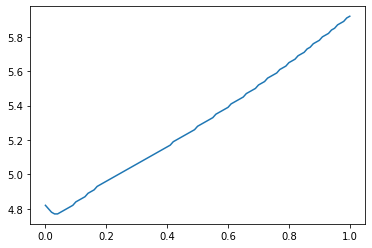

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(data.iloc[:, :-1], 
                                                  data['target'], 
                                                  test_size = 0.25,
                                                  random_state = 1)

def rmse(y_true, y_pred):
    return np.sqrt(metrics.mean_squared_error(y_true, y_pred))

from sklearn.linear_model import Lasso
error_list = []

alphas = [i*0.01 for i in range(0, 101)]

for l in alphas:
    model = Lasso(alpha=l)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_val)

    error = rmse(y_val, y_pred)

    error_list.append(round(error, 2))

import matplotlib.pyplot as plt
plt.plot(alphas, error_list)





In [ ]:
best_alpha = alphas[error_list.index(min(error_list))]
best_alpha 


model = Lasso(alpha=best_alpha)
model.fit(X_train, y_train)

y_pred = model.predict(X_val)



**TODO 10**

Evaluate the prediction performance of Model 3 on the validation set with RMSE and MAE as performance matrics.

In [ ]:
from sklearn import metrics

mae = metrics.mean_absolute_error(y_val, y_pred)
print(mae)


rmse = np.sqrt(metrics.mean_squared_error(y_val, y_pred))
print(rmse)

3.585646825881763
4.772820793504805



**TODO 11**

Among Model 1, 2, and 3, which one would be your pick for future implementation? State your reasons.

## Part 2: K-Nearst-Neighbors

### Problem 2 ##

The wine dataset is the result of a chemical analysis of wines produced in the same region in Italy but derived from three different cultivars. (For illustration simplicity purpose, only 2 classes, 0 and 1, will be included for the classification task.) The analysis determined the quantities of 13 constituents found in each of the three types of wines.

The objective is to classify the wines into class 0 or 1 using the 13 given attributes and k-NN classifier.

In [ ]:
# convert the data into dataframe format
X = pd.DataFrame(wine['data'], columns = wine['feature_names'])
y = wine['target']

# only consider wine class 0 and 1
X = X.loc[0:129, :]
y = y[0:130]

X.head()


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [ ]:
data = X
data['target'] = y

In [ ]:
data.shape

(130, 14)

**TODO 1**

Considering the fundamental idea of k-NN, would you recommend data rescaling before model building? Why? 

If so, partition the data into 75% training and 25% validation set, then standardize them.

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(data.iloc[:, :-1], 
                                                  data['target'], 
                                                  test_size = 0.25,
                                                  random_state = 1)

In [ ]:
X_train.shape
y_train.shape

(97,)

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_val = scaler.transform(X_val)

**TODO 2**

Choose the best k from 1-10 based on the classification accuracy of different k values on the validation set.

In [ ]:

from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

accuracy_list = []
for k in range(1,11):
    knn = KNeighborsClassifier(n_neighbors=k)

    knn.fit(X_train, y_train)

    y_pred = knn.predict(X_val)

    acc = metrics.accuracy_score(y_val, y_pred)

    accuracy_list.append([k, acc])

print(accuracy_list)

best_k = max(accuracy_list, key = lambda x:x[1])[0]
print(best_k)

[[1, 0.9393939393939394], [2, 0.9090909090909091], [3, 0.9393939393939394], [4, 0.8787878787878788], [5, 1.0], [6, 1.0], [7, 1.0], [8, 0.9696969696969697], [9, 1.0], [10, 0.9696969696969697]]
5


**TODO 3**

Classify the new record given below using the chosen k. 

Considering the size of the wine dataset, would you recommend data partition before scoring the new record? Why?

In [ ]:
# New record
new_wine = pd.DataFrame(columns = wine['feature_names'])
new_wine.loc[0,:] = np.array([14.12, 1.88, 2.31, 18.5, 125, 2.50, 3.12, 0.26, 2.12, 4.87, 1.02, 3.23, 955])
new_wine

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.12,1.88,2.31,18.5,125.0,2.5,3.12,0.26,2.12,4.87,1.02,3.23,955.0


In [ ]:
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)

new_wine = scaler.transform(new_wine)

y_pred = knn.predict(new_wine)
print(y_pred)

[0]


### Problem 3 ##

The data concerns city-cycle fuel consumption in miles per gallon (mpg). The objective is to use k-NN classifier to predict the mpg with the given attributes.

In [ ]:
# import the dataset "auto_mpg.csv"
import pandas as pd
from google.colab import files
file = files.upload()

df = pd.read_csv('auto_mpg.csv')
df.head()

Saving auto_mpg.csv to auto_mpg.csv


,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [ ]:
df = df[df['horsepower']!='?']

In [ ]:

X = df.iloc[:, 1:]
y = df['mpg'].astype(int)


**TODO 1**

Check the unique value of the variable "car name". 

Would you recommend keeping "car name" for prediction? Why? 

If not, eliminate the variable "car name".

In [ ]:
y.head()

0    18
1    15
2    18
3    16
4    17
Name: mpg, dtype: int64

In [ ]:

"""
More than 75 % of values in column "Car Name" are unique. So it doesn't help for our prediction.
So, we decided to remove this variable
"""
X['car name'].nunique()

301

In [ ]:
X.drop(columns= ['car name'], inplace=True)
X.head()

,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,8,307.0,130,3504,12.0,70,1
1,8,350.0,165,3693,11.5,70,1
2,8,318.0,150,3436,11.0,70,1
3,8,304.0,150,3433,12.0,70,1
4,8,302.0,140,3449,10.5,70,1


**TODO 2**

Convert the variable "origin" to dummy variables before modeling

In [ ]:
X['origin'].unique()

df_dc = pd.get_dummies(X, columns=['origin'])
df_dc.head()

,cylinders,displacement,horsepower,weight,acceleration,model year,origin_1,origin_2,origin_3
0,8,307.0,130,3504,12.0,70,1,0,0
1,8,350.0,165,3693,11.5,70,1,0,0
2,8,318.0,150,3436,11.0,70,1,0,0
3,8,304.0,150,3433,12.0,70,1,0,0
4,8,302.0,140,3449,10.5,70,1,0,0


**TODO 3**

Rescale the numeric data. Note that dummy variables should not be rescaled.

In [ ]:
X.head()

,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,8,307.0,130,3504,12.0,70,1
1,8,350.0,165,3693,11.5,70,1
2,8,318.0,150,3436,11.0,70,1
3,8,304.0,150,3433,12.0,70,1
4,8,302.0,140,3449,10.5,70,1


In [ ]:
# if all(df_dc.isna() | df_dc.isnull() ):
#   print('NULLS')
# df_dc[df_dc.isna().any(axis=1)]
# 
# df_dc = df_dc[df_dc['horsepower']!='?']
# [col for col in df_dc.columns if col != 'origin']
# print(col)

mpg
cylinders
displacement
horsepower
weight
acceleration
model year
origin_1
origin_2
origin_3


In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

numeric_features = [col for col in X.columns if col not in ('origin')]
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_features = ['origin']
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

p_df = preprocessor.fit_transform(X)
p_df

array([[ 1.48394702,  1.07728956,  0.66413273, ...,  1.        ,
         0.        ,  0.        ],
       [ 1.48394702,  1.48873169,  1.57459447, ...,  1.        ,
         0.        ,  0.        ],
       [ 1.48394702,  1.1825422 ,  1.18439658, ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [-0.86401356, -0.56847897, -0.53247413, ...,  1.        ,
         0.        ,  0.        ],
       [-0.86401356, -0.7120053 , -0.66254009, ...,  1.        ,
         0.        ,  0.        ],
       [-0.86401356, -0.72157372, -0.58450051, ...,  1.        ,
         0.        ,  0.        ]])

In [ ]:
X_df = pd.DataFrame(p_df, columns = df_dc.columns)
X_df.head()


,cylinders,displacement,horsepower,weight,acceleration,model year,origin_1,origin_2,origin_3
0,1.483947,1.077290,0.664133,0.620540,-1.285258,-1.625315,1.0,0.0,0.0
1,1.483947,1.488732,1.574594,0.843334,-1.466724,-1.625315,1.0,0.0,0.0
2,1.483947,1.182542,1.184397,0.540382,-1.648189,-1.625315,1.0,0.0,0.0
3,1.483947,1.048584,1.184397,0.536845,-1.285258,-1.625315,1.0,0.0,0.0
4,1.483947,1.029447,0.924265,0.555706,-1.829655,-1.625315,1.0,0.0,0.0


**TODO 4**

Partition the data into 75% training and 25% validation set.

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_df, 
                                                  y, 
                                                  test_size = 0.25,
                                                  random_state = 1)

**TODO 5**

Choose the best k from 1-10 based on the MSE of different k values on the validation set. Explain the reason for your choice.

In [ ]:
X_train

,cylinders,displacement,horsepower,weight,acceleration,model year,origin_1,origin_2,origin_3
257,0.309967,0.053468,-0.506461,0.108940,0.420519,0.549168,1.0,0.0,0.0
287,1.483947,1.488732,1.314463,1.629595,-0.232757,0.820978,1.0,0.0,0.0
107,-0.864014,-0.932079,-0.428421,-0.823493,1.255261,-0.809884,0.0,0.0,1.0
204,-0.864014,-0.520637,-0.844632,-0.486355,-0.704568,0.005547,1.0,0.0,0.0
98,0.309967,0.359658,-0.116263,-0.038410,0.166467,-0.809884,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
203,-0.864014,-0.932079,-0.766593,-0.969664,0.311639,0.005547,0.0,0.0,1.0
255,0.309967,0.359658,-0.376395,0.273972,0.601984,0.549168,1.0,0.0,0.0
72,1.483947,1.077290,0.664133,1.320749,-0.559396,-1.081695,1.0,0.0,0.0
235,-0.864014,-0.922511,-1.078751,-1.092260,0.529398,0.277358,1.0,0.0,0.0


In [ ]:
# https://towardsdatascience.com/knn-using-scikit-learn-c6bed765be75


from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

k_range = range(1,11)
scores = {}
scores_list = []

for k in k_range:
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train, y_train)
  y_pred = knn.predict(X_val)

  scores[k] = metrics.accuracy_score(y_val,y_pred)
  scores_list.append(metrics.accuracy_score(y_val,y_pred) *100 )

print(scores)



{1: 0.12244897959183673, 2: 0.11224489795918367, 3: 0.08163265306122448, 4: 0.14285714285714285, 5: 0.17346938775510204, 6: 0.15306122448979592, 7: 0.14285714285714285, 8: 0.17346938775510204, 9: 0.17346938775510204, 10: 0.14285714285714285}


In [ ]:
scores_list

[12.244897959183673,
 11.224489795918368,
 8.16326530612245,
 14.285714285714285,
 17.346938775510203,
 15.306122448979592,
 14.285714285714285,
 17.346938775510203,
 17.346938775510203,
 14.285714285714285]

**TODO 6**


Score the validation set with the best k. Comment on the model performance.

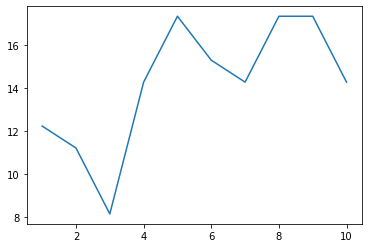

In [ ]:

import matplotlib.pyplot as plt

plt.plot( k_range, scores_list)
# plt.xlabel('KNN scores')
# plt.ylabel('accuracy score')



In [ ]:
plt.show()

None
